In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, image
from sklearn.model_selection import train_test_split
from pathlib import Path

%matplotlib inline                               

In [59]:
p = Path('.')
pklot_files = list(Path().glob('project/PKLot/PKLot/*/*/*/*.jpg'))
json = [Path('json/' + file.with_suffix('.json').name) for file in pklot_files]
df = pd.DataFrame({"img": pklot_files, "json": json})

In [60]:
train, test = train_test_split(df, test_size=0.2)

In [17]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img(pklot_files[0], target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

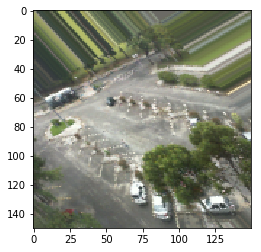

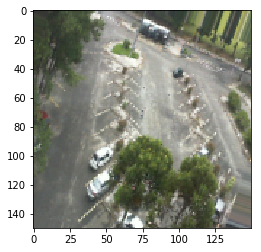

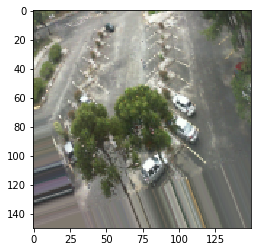

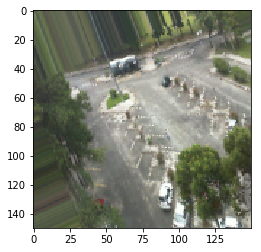

In [63]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()